In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.io import loadmat
from numpy.linalg import det, inv
from math import sqrt, pi
import scipy.io
import matplotlib.pyplot as plt
import pickle
import sys
%matplotlib inline

In [9]:
#Problem 2
def learnOLERegression(X,y):
    # Inputs:
    # X = N x d
    # y = N x 1
    # Output:
    # w = d x 1

    transpose_X = np.transpose(X)
    a = np.dot(transpose_X,X)
    b = np.dot(transpose_X,y)
    inverse = np.linalg.inv(a)

    w = np.dot(inverse,b)
    print(w.shape)

    return w

In [10]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = X x 1
    # Output:
    # rmse

    one_over_N = 1.0/Xtest.shape[0] #1/N
    transpose_w = np.transpose(w)
    transpose_X = np.transpose(Xtest)
    transpose_y = np.transpose(ytest)

    a = np.dot(transpose_w,transpose_X)
    b = np.subtract(transpose_y, a)
    c = np.power(b,2)
    d = np.dot(c, one_over_N)
    sum_vector = np.sum(d)
    rmse = np.sqrt(sum_vector)

    return rmse

In [11]:
def learnRidgeRegression(X,y,lambd):
    # Inputs:
    # X = N x d                                                               
    # y = N x 1 
    # lambd = ridge parameter (scalar)
    # Output:                                                                  
    # w = d x 1   
    
    # IMPLEMENT THIS METHOD
    
    # added : by Zulkar
    d = X.shape[1]
    X_transpose = np.transpose(X)
    X_squared = np.dot(X_transpose,X)
    lambda_Id = lambd * np.identity(d)
    
    part_1 = lambda_Id + X_squared
    inv_part_1 = np.linalg.inv(part_1)
    part_2 = np.dot(inv_part_1,X_transpose)
    w = np.dot(part_2,y)
    
                                                       
    return w

In [12]:
def regressionObjVal(w, X, y, lambd):
    
    # error J(w) = 0.5 * sum(y - wt.x)^2 + 0.5*lambda*(wt.w)
    w_new = w.reshape((w.shape[0],1))
    wt_x = np.dot(X,w_new)
    y_minus_wtx = y - wt_x;
    squared_error = np.sum(np.square( y_minus_wtx ))
    error = 0.5 * squared_error + (0.5 * lambd * np.dot(w.T,w))
    
    
    #error_grad = d/dw {J(w)} : (Xt.X).w - Xt.y + lambda * w  : dimension : 65x1 
    XtX = np.dot(X.T,X)
    XtX_w = np.dot(XtX,w_new)
    Xty = np.dot(X.T,y)
    lambda_w = lambd * w_new
    
    error_grad = (XtX_w - Xty + lambda_w)
    error_grad = error_grad.flatten()
    
    return error, error_grad

In [13]:
#Problem 5
def mapNonLinear(x,p):
    # Inputs:
    # x - a single column vector (N x 1)
    # p - integer (>= 0)
    # Outputs:
    # Xd - (N x (p+1))

    N = x.shape[0]
    Xd = np.zeros((N,p+1))
    '''
    for i in (0, N-1):
        for k in (0,p):
            Xd[i][k] = x[k] ** k
            # print(Xd[i][k])
    '''
    
    for index in range(0, p+1):
        Xd[:, index] = x ** index   
    # print(Xd.shape)
    return Xd

(64, 1)
(65, 1)
RMSE without intercept 326.764994391
RMSE with intercept 60.8920370941


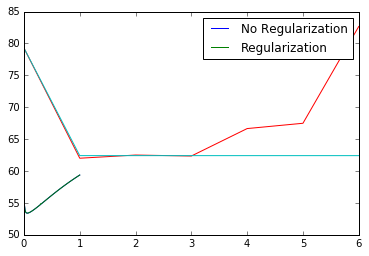

In [14]:
# Problem 2

if sys.version_info.major == 2:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'))
else:
    X,y,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding = 'latin1')

# add intercept
X_i = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(X,y)
mle = testOLERegression(w,Xtest,ytest)

w_i = learnOLERegression(X_i,y)
mle_i = testOLERegression(w_i,Xtest_i,ytest)

print('RMSE without intercept '+str(mle))
print('RMSE with intercept '+str(mle_i))


# Problem 3
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
rmses3 = np.zeros((k,1))
for lambd in lambdas:
    w_l = learnRidgeRegression(X_i,y,lambd)
    rmses3[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
plt.plot(lambdas,rmses3)



# Problem 4
k = 101
lambdas = np.linspace(0, 1, num=k)
i = 0
rmses4 = np.zeros((k,1))
opts = {'maxiter' : 100}    # Preferred value.                                                
w_init = np.ones((X_i.shape[1],1))
for lambd in lambdas:
    args = (X_i, y, lambd)
    w_l = minimize(regressionObjVal, w_init, jac=True, args=args,method='CG', options=opts)
    w_l = np.transpose(np.array(w_l.x))
    w_l = np.reshape(w_l,[len(w_l),1])
    rmses4[i] = testOLERegression(w_l,Xtest_i,ytest)
    i = i + 1
plt.plot(lambdas,rmses4)


# Problem 5
pmax = 7
lambda_opt = lambdas[np.argmin(rmses4)]
rmses5 = np.zeros((pmax,2))
for p in range(pmax):
    Xd = mapNonLinear(X[:,2],p)
    Xdtest = mapNonLinear(Xtest[:,2],p)
    w_d1 = learnRidgeRegression(Xd,y,0)
    rmses5[p,0] = testOLERegression(w_d1,Xdtest,ytest)
    w_d2 = learnRidgeRegression(Xd,y,lambda_opt)
    rmses5[p,1] = testOLERegression(w_d2,Xdtest,ytest)
plt.plot(range(pmax),rmses5)
plt.legend(('No Regularization','Regularization'))